In [1]:
import pandas as pd
from citipy import citipy
import requests
import json
import numpy as np
from pprint import pprint
from config import api_key
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
# generate a list of random numbers for latitude and longitude and use citipy to identify nearby city
# 250 cities above and 250 cities below equator using +ve and -ve values of latitude

lat = 90*np.random.rand(250)
lat = np.append(lat, -90*np.random.rand(250))
lng = 180*np.random.rand(500)

cities =[]

for x,y in zip(lat,lng):
    city = citipy.nearest_city(x,y)
    cities.append(city.city_name)

cities[1:10]  


['braintree',
 'arkhara',
 'salalah',
 'mecca',
 'mao',
 'tiksi',
 'annau',
 'kavaratti',
 'bosaso']

In [3]:

citi_data = pd.DataFrame(columns=['name','latitude','longitude','temperature','cloudiness', 'humidity', 'windspeed'])
citi_data['name']=cities

base_url = 'http://api.openweathermap.org/data/2.5/weather?q='

for index,row in citi_data.iterrows():
    target_url = base_url+row['name']+'&appid='+api_key+'&units=imperial'
    response = requests.get(target_url).json()
    try:
        citi_data.loc[index,'latitude'] = response['coord']['lat']
        citi_data.loc[index,'longitude'] = response['coord']['lon']
        citi_data.loc[index,'temperature'] = response['main']['temp']
        citi_data.loc[index,'cloudiness'] = response['clouds']['all']
        citi_data.loc[index,'humidity'] = response['main']['humidity']
        citi_data.loc[index,'windspeed'] = response['wind']['speed']
    except (NameError,KeyError) as e:
        print(e)

citi_data.dropna(inplace=True)

citi_data

'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'
'coord'


,name,latitude,longitude,temperature,cloudiness,humidity,windspeed
0,cherskiy,68.75,161.3,48.7,11,44,6.96
1,braintree,51.8782,0.5529,47.75,100,95,8.55
2,arkhara,49.4212,130.084,59.63,100,46,13.06
3,salalah,17.0151,54.0924,82.49,40,78,2.3
4,mecca,21.4267,39.8261,82.69,5,48,0.98
...,...,...,...,...,...,...,...
495,richards bay,-28.783,32.0377,61.88,0,83,9.75
496,kruisfontein,-34.0033,24.7314,62.89,46,29,10.63
497,bredasdorp,-34.5322,20.0403,56.28,100,41,6.98
498,hithadhoo,-0.6,73.0833,83.97,86,69,10.4


In [4]:
citi_data.to_csv('citi_data.csv')
citi_data.isnull().sum()
citi_data[['latitude','longitude','temperature','cloudiness','humidity','windspeed']] = citi_data[['latitude','longitude','temperature','cloudiness','humidity','windspeed']].astype(float)
citi_data.dtypes

name            object
latitude       float64
longitude      float64
temperature    float64
cloudiness     float64
humidity       float64
windspeed      float64
dtype: object

array([[<AxesSubplot:xlabel='latitude', ylabel='temperature'>,
        <AxesSubplot:xlabel='latitude', ylabel='cloudiness'>],
       [<AxesSubplot:xlabel='latitude', ylabel='humidity'>,
        <AxesSubplot:xlabel='latitude', ylabel='windspeed'>]],
      dtype=object)

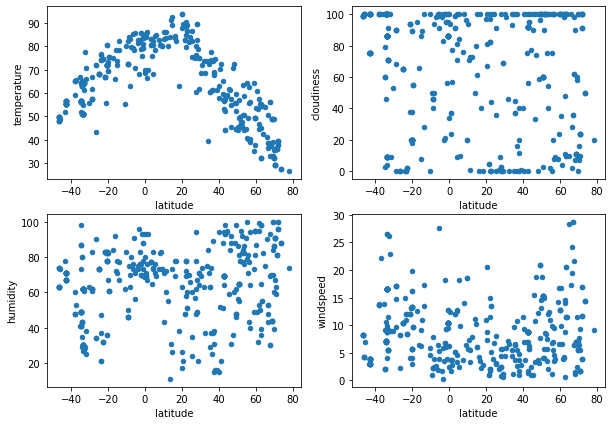

In [14]:
fig,ax=plt.subplots(2,2, figsize=(10,7))
citi_data.plot.scatter(x='latitude',y='temperature', ax = ax[0,0])
citi_data.plot.scatter(x='latitude',y='cloudiness', ax = ax[0,1])
citi_data.plot.scatter(x='latitude',y='humidity', ax = ax[1,0])
citi_data.plot.scatter(x='latitude',y='windspeed', ax = ax[1,1])
ax

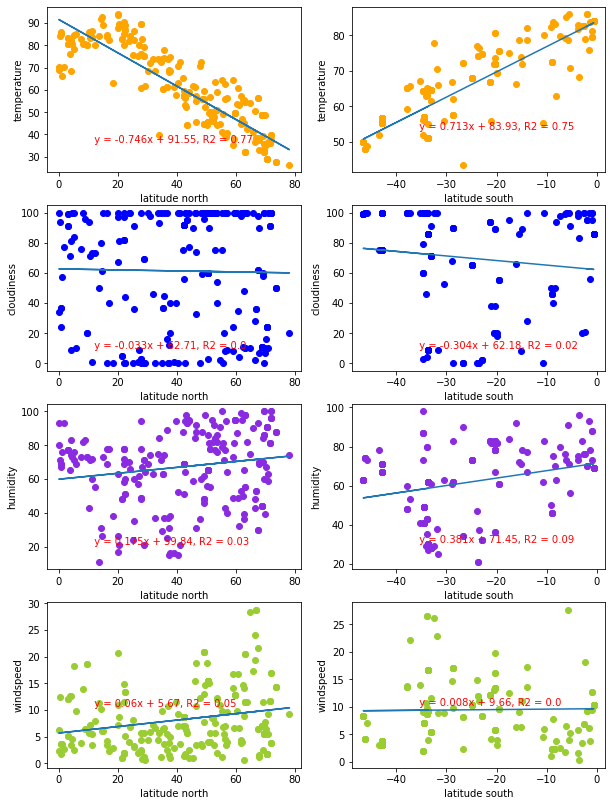

In [33]:
var_list =['temperature','cloudiness','humidity','windspeed']
color_list =['orange','blue','blueviolet','yellowgreen']
north = citi_data['latitude']>0
south = citi_data['latitude']<0
fig,ax1 = plt.subplots(4,2,figsize=(10,14))


for index,variable in enumerate(var_list):
    x_north = citi_data.loc[north,'latitude']
    x_south = citi_data.loc[south,'latitude']
    y_north = citi_data.loc[north,variable]
    y_south = citi_data.loc[south,variable]  

    ax1[index,0].scatter(x=x_north,y=y_north,color=color_list[index])
    ax1[index,0].set(ylabel = variable, xlabel='latitude north' )
    ax1[index,1].scatter(x=x_south,y=y_south,color=color_list[index])
    ax1[index,1].set(ylabel = variable, xlabel='latitude south')
    
    (slope_n, intercept_n, rval_n, pval, stderr) = linregress(x_north,y_north)
    (slope_s, intercept_s, rval_s, pval, stderr) = linregress(x_south,y_south)
    
    yval_north = slope_n*x_north + intercept_n
    yval_south = slope_s*x_south + intercept_s
    ax1[index,0].plot(x_north,yval_north)
    ax1[index,1].plot(x_south,yval_south)
    eqn_north = f'  y = {round(slope_n,3)}x + {round(intercept_n,2)}, R2 = {round(rval_n*rval_n,2)}'
    eqn_south = f'  y = {round(slope_s,3)}x + {round(intercept_s,2)}, R2 = {round(rval_s*rval_s,2)}'
    ymin = y_north.min()
    xmin = x_north.min()
    ax1[index,0].annotate(eqn_north,(xmin+10,ymin+10),fontsize=10,color="red")
    ymin = y_south.min()  
    xmin = x_south.min()
    ax1[index,1].annotate(eqn_south,(xmin+10,ymin+10),fontsize=10,color="red")
    
    
    
    # plt.scatter(x=x_south,y=y_south,ax=ax[index,1])
    
# y_min =y.min()


# print(slope, intercept, rval, pval, stderr)
# 

# plt.plot(x,yval,color ='red')
# line_eqn = f'y = {round(slope,3)}x + {round(intercept,2)}, R2 = {round(rval*rval,3)}'
# plt.annotate(line_eqn,(0,y_min+10),fontsize=10,color="red")
